In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
data = pd.read_csv('emails.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [37]:
X = data['text']
y = data['spam']

In [38]:
vectorize = TfidfVectorizer()
XV = vectorize.fit_transform(X)

In [39]:
XV

<5728x37303 sparse matrix of type '<class 'numpy.float64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [43]:
X_train , X_test, y_train , y_test = train_test_split(XV,y,test_size = 0.2)

In [45]:
model = SVC(kernel = 'linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9921465968586387

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       893
           1       0.99      0.98      0.98       253

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



<Axes: >

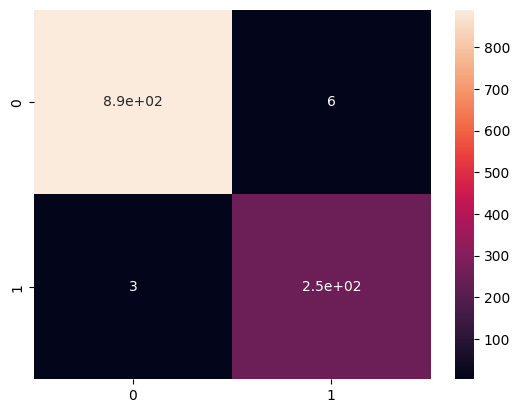

In [52]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot = True)

In [63]:
# Define a function to classify email subjects
def classify_email(subject):
    vectorized_subject = vectorizer.transform([subject])
    prediction = model.predict(vectorized_subject)
    if prediction[0] == 1:
        return "Spam"
    else:
        return "Not Spam"

# Ask the user to enter an email subject
user_input = input("Enter an email subject: ")
classification_result = classify_email(user_input)
print("Classification:", classification_result)

Enter an email subject:  Thanks for you help sir


Classification: Not Spam


In [76]:
string = data.iloc[0,0]

In [77]:
vectorizer.transform([string])
model.predict(vectorizer.transform([string]))

array([1], dtype=int64)

In [78]:
data.iloc[0]

text    Subject: naturally irresistible your corporate...
spam                                                    1
Name: 0, dtype: object